In [1]:
import os
import xml.etree.cElementTree as ET
import xml.dom.minidom as xdom

## 1
### 苏黎世pbf数据转码\提取

In [14]:
OSMPBF_PATH = "E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland.osm.pbf"

def convert_pbf_osm (pbf_file) :
    base_path = 'E:/AAA_Study/202003_GraduationProject/'
    osmconvert_path = base_path + 'osmconvert'
    osm_file = pbf_file.replace('.osm.pbf','.osm')
    
    terminal_code = '{} {} > {}'.format(osmconvert_path,pbf_file,osm_file)
    os.system(terminal_code)
    print ('{} converted to {}'.format(pbf_file,osm_file))

In [5]:
convert_pbf_osm(OSMPBF_PATH)

E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland.osm.pbf converted to E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland.osm


In [15]:
OSM_PATH = "E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland.osm"


In [6]:
def count_tags(filename):
    #1.读文件
    osm = ET.ElementTree(file=filename)
    #2.获取根节点
    root = osm.getroot()
    #3.获取根节点的标签,创建一个字典来存放标签名和次数
    tags_count_dic = {root.tag:0}
    #4.循环文件
    for _,ele in ET.iterparse(filename,events=('start',)):
        #5.如果有元素的tag在字典中,则value的值+1,否则表示该标签只出现一次
        if ele.tag in tags_count_dic:
            tags_count_dic[ele.tag] += 1
        else:
            tags_count_dic[ele.tag] = 1
    return tags_count_dic

In [10]:
count_tags(OSM_PATH)

{'osm': 1,
 'node': 3293712,
 'tag': 2449714,
 'way': 521134,
 'nd': 4042394,
 'relation': 9900,
 'member': 391522}

In [12]:
#教育建筑
def education_extract(filename):
    sel_osmkey = 'amenity'
    sel_osmvalue = ['college','driving_school','kindergarten','language_school','library','toy_library','music_school','school','university']
    
    osmfilter_path = 'E:/AAA_Study/202003_GraduationProject/' + 'osmfilter'
#     output_path = 'E:/AAA_Study/202003_GraduationProject/MapData/OSMData/education/'
    
    for value in sel_osmvalue:
        sel_element = sel_osmkey + "=" + value
        print (sel_element)
        output_sel = filename.replace('.osm','_{}.osm'.format(value))
        print (output_sel)
        terminal_code = '{} {} --keep="{}" -o={}'.format(osmfilter_path,filename,sel_element,output_sel)
        os.system(terminal_code)
        print ('{} extracted success!'.format(value)) 
    print("------education extracted success------")
   

In [16]:
education_extract(OSM_PATH)

amenity=college
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_college.osm
college extracted success!
amenity=driving_school
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_driving_school.osm
driving_school extracted success!
amenity=kindergarten
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_kindergarten.osm
kindergarten extracted success!
amenity=language_school
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_language_school.osm
language_school extracted success!
amenity=library
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_library.osm
library extracted success!
amenity=toy_library
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_toy_library.osm
toy_library extracted success!
amenity=music_school
E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland_music_scho

### 合并osm文件，便于统一抽取数据
### 北京和苏黎世的"教育建筑"数据各自合并一下

In [26]:
OSM_FILES_PATH = "E:/AAA_Study/202003_GraduationProject/MapData/OSMData/mergetest/"
MERGED_OSM_FILE = "E:/AAA_Study/202003_GraduationProject/MapData/OSMData/mergetest/merge_temp.osm"

In [17]:
def clearBlankLine (inputFile):
    outputFile = inputFile.replace('_temp.osm','.osm')
    file1 = open(inputFile, 'r') 
    file2 = open(outputFile, 'w') 
    try:
        for line in file1.readlines():
            if line == '\n':
                line = line.strip("\n")
            file2.write(line)
    finally:
        file1.close()
        file2.close()
    print ('blank lines cleared')

    
def osmFileMerge (osm_files_path,output_file) :
    overallData=[]
    osm_files = os.listdir(osm_files_path)
    for file in osm_files:
        eachfile_path = osm_files_path + file
        eachData = []
        doc = xdom.parse(eachfile_path)
        each_root = doc.documentElement
        #提取node way relation 三类element
        nodes=each_root.getElementsByTagName('node')
        ways=each_root.getElementsByTagName('way')
        relations=each_root.getElementsByTagName('relation')

        eachData = nodes + ways + relations
        overallData += eachData
    
    #print(overallData)
    impl = xdom.getDOMImplementation()
    dom = impl.createDocument(None,'osm', None)
    dom.actualEncoding='utf-8'
    final_root = dom.documentElement
    
    for text in overallData:
        final_root.appendChild(text)
        
    if output_file is None:
        return dom 
    else:
        f = open(output_file,'ab') 
        f.write(b'<?xml version="1.0" encoding="utf-8"?>')
#         bytes(s, encoding = "utf8")
        f.write(final_root.toprettyxml(encoding='utf-8'))
        print (output_file + 'osm document merge completed')
        f.close() 
        return dom

# osmFileMerge(OSM_FILES_PATH,MERGED_OSM_FILE)
# clearBlankLine(MERGED_OSM_FILE)

In [18]:
BEIJING_FILES_PATH = 'E:/AAA_Study/202003_GraduationProject/MapData/OSMData/education/beijing/'
BEIJING_FILENAME = 'beijing_china_EDUCATION.osm'
ZURICH_FILES_PATH = 'E:/AAA_Study/202003_GraduationProject/MapData/OSMData/education/zurich/'
ZURICH_FILENAME = 'zurich_switzerland_EDUCATION.osm'

## 2 
### （1）按照中心点进行提取（以大学校园为例）
### （2）一些分析角度（osmnx包）

In [7]:
count_tags(BEIJING_FILES_PATH + BEIJING_FILENAME)
#输出：'node': 9932,有9932个poi位置

{'osm': 1,
 'node': 9932,
 'tag': 4082,
 'way': 1200,
 'nd': 10974,
 'relation': 20,
 'member': 51}

In [24]:
# def getCoordinates(filename):
#     osm = ET.ElementTree(file=filename)
#     root = osm.getroot()
#     for neighbor in root.iter('way'):
#         print (neighbor.attrib)


In [2]:
coords_z = [(47.3716777,8.5485886),(47.450041,8.6829594),(47.4935204,8.7159408)]
coords_b = [(40.0010733,116.2728372),(40.0240076,116.3110813),(39.7509767,116.275633)]

In [1]:
import osmnx as ox
import networkx as nx
from IPython.display import Image

#### 路网
#### 道路拓扑关系

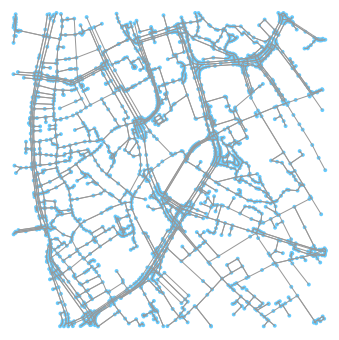

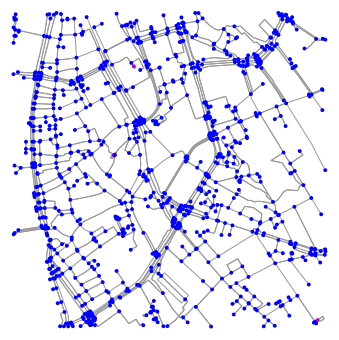

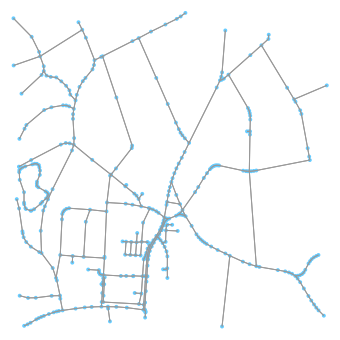

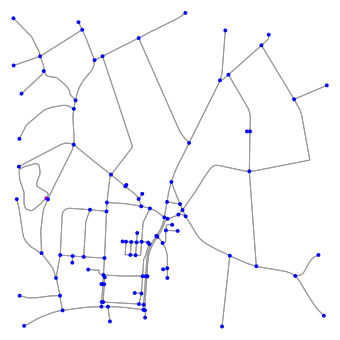

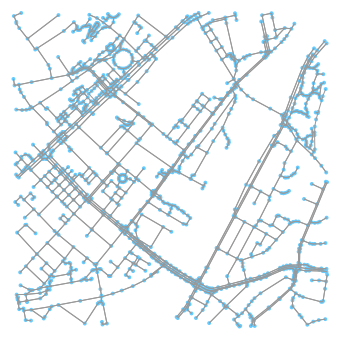

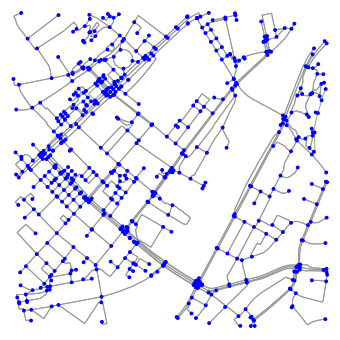

In [81]:
for coord in coords_z:
    G = ox.graph_from_point(coord, distance=500, network_type='all',simplify=False)
    ox.plot_graph(G)
    # simplify the network
    G2 = G.copy()
    G2 = ox.simplify_graph(G2)
    loops = [edge[0] for edge in nx.selfloop_edges(G2)]
    nc = ['m' if node in loops else 'b' for node in G2.nodes()]
    fig, ax = ox.plot_graph(G2, node_color=nc, node_zorder=3)

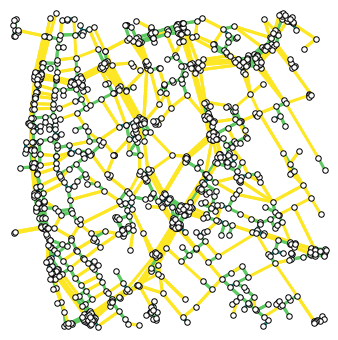

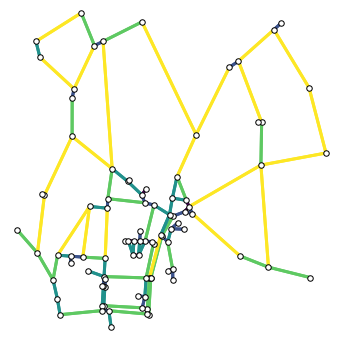

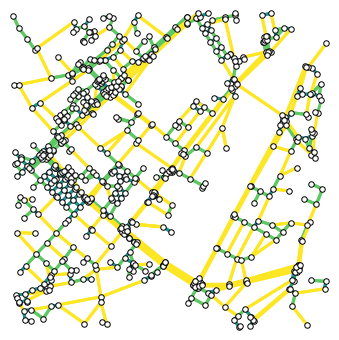

In [4]:
for coord in coords_z:
    G = ox.graph_from_point(coord, distance=500, network_type='all')
    # plot same network ignoring the edges' spatial geometry
    ec = ox.get_edge_colors_by_attr(G, attr='length')
    fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, 
                           edge_color=ec, edge_linewidth=3, edge_alpha=1, use_geom=False)

#### 建筑矢量 图底关系
#### 计算面积、建筑密度等指标

13952883    3994.357806
27306847    2318.924779
27307078    2399.258491
27307145     937.981912
27307158    1550.986958
dtype: float64


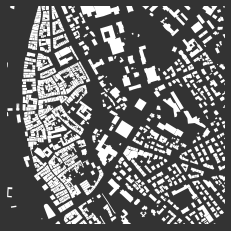

32619447    1645.283235
32619448     972.807645
32619449    1389.666422
32619450    1968.800341
32619451    1782.195914
dtype: float64


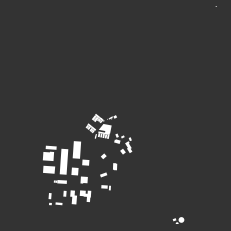

22428731    5152.842110
22430631     154.922012
22430780     837.829229
22468102     281.248677
22468103     695.859240
dtype: float64


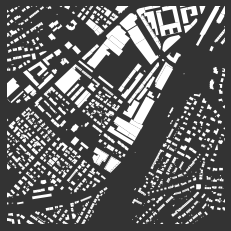

In [71]:
for coord in coords_z:
    gdf = ox.footprints.footprints_from_point(point=coord, distance=500)
    gdf_proj = ox.project_gdf(gdf)
    
    areas = gdf_proj.area
    print(areas.head())
    
    bbox = ox.bbox_from_point(point=coord, distance=500, project_utm=True)
    fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,save=False, show=True, close=True, filename='paris_bldgs', dpi=90)


In [88]:
img_folder = 'images'
extension = 'png'
size = 240

In [85]:
def make_plot(place, point, network_type='all', bldg_color='red', dpi=40,
              dist=500, default_width=4, street_widths=None):
    gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

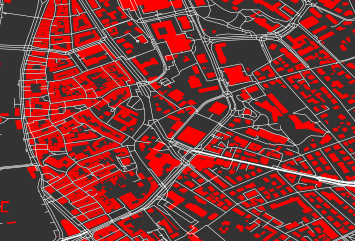

In [89]:
place = 'portland_buildings'
point = (47.3716777,8.5485886)
make_plot(place, point,network_type='all', default_width=1, street_widths={'secondary':3})
Image('{}/{}.{}'.format(img_folder, place, extension), height=300, width=300)

In [66]:
for coord in coords_z:
    place = 'portland_buildings'
#     point = (45.517309, -122.682138)
    make_plot(place, coord)
    Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

#### （1）现有分析角度主要基于osmnx包的功能，可增加分析角度
### （2）osmnx包的数据是在线获取的，本地数据没用上，可能需要参考其源码来自己写一些东西
## （3）中期的工作量主要展示前半期获取的数据，可视化的分析图、框架流程图等
# （4）中期后，有一个重点可能是各种分析的角度怎么体现到“推荐系统”的计算中

In [1]:
def 营销号生成器(主体, 事件, 另一种说法):
    line1 = 主体 + 事件 + '是怎么回事呢？'
    line2 = 主体 + '相信大家都很熟悉，但是' + 主体 + 事件 + '究竟是怎么一回事呢，下面由小编带大家一起了解吧！' + '\n'
    line3 = 主体 + 事件 + '其实就是' + 另一种说法 + '，大家可能会惊讶' + 主体 + '怎么会' + 事件 + '呢？'
    line4 = '但事实就是这样，连小编都觉得很惊讶呢。'+ '\n'
    line5 = '这就是关于' + 主体 + 事件 + '的全部内容了，'
    line6 = '大家有什么想法呢，欢迎到评论区告诉小编来一起讨论吧！'
    print(line1+line2+line3+line4+line5+line6)

In [2]:
营销号生成器('正当防卫4','出联机模式','正当防卫4的玩家自创了私服联机mod，官方是没有联机模式的哟')

正当防卫4出联机模式是怎么回事呢？正当防卫4相信大家都很熟悉，但是正当防卫4出联机模式究竟是怎么一回事呢，下面由小编带大家一起了解吧！
正当防卫4出联机模式其实就是正当防卫4的玩家自创了私服联机mod，官方是没有联机模式的哟，大家可能会惊讶正当防卫4怎么会出联机模式呢？但事实就是这样，连小编都觉得很惊讶呢。
这就是关于正当防卫4出联机模式的全部内容了，大家有什么想法呢，欢迎到评论区告诉小编来一起讨论吧！
